# **Part 4 - Data Wrangling**

In this notebook, I will perform the following:

* Identify duplicate rows in the dataset.
* Use suitable techniques to remove duplicate rows and verify the removal.
* Summarize how to handle missing values appropriately.
* Use ConvertedCompYearly to normalize compensation data.

In [1]:
# Installing the required libraries
!pip install pandas
!pip install matplotlib

In [21]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11548,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11549,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11550,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

# **Finding Duplicates**

### _1. Identifying Duplicate Rows_

In [14]:
# Counting the number of duplicate rows in the dataset
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

154

In [20]:
# Displaying the first few duplicate rows to understand their structure
duplicated_rows.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1168,2339,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1169,2342,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,Some college/university study without earning ...,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech meetups or events in your area;Courses on...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Easy
1170,2343,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Canada,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,27.0,Man,No,Straight / Heterosexual,Black or of African descent;White or of Europe...,No,Appropriate in length,Neither easy nor difficult
1171,2344,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1172,2347,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Woman,No,Straight / Heterosexual,Biracial,No,Too long,Easy


### _2. Analyzing Characteristics of Duplicates_

In [18]:
#  Identifying which columns have the same values in duplicate rows
duplicated_data = df[df.duplicated(keep=False)]  # Selecting only the duplicate rows

columns_with_identical_values = duplicated_data.loc[:, duplicated_data.nunique() == 1].columns  # Identifying columns where all duplicate rows have the same values

print("Columns with identical values in duplicate rows:")
print(columns_with_identical_values)

Columns with identical values in duplicate rows:
Index(['Trans'], dtype='object')


In [15]:
# Analyzing the distribution of duplicates by Country
country_distribution = duplicated_rows['Country'].value_counts()

country_distribution_df = country_distribution.reset_index()
country_distribution_df.columns = ['Country', 'Duplicate_Count']  # Converting the Series to a DataFrame

print("Distribution of duplicates by Country:")  # Displaying the DataFrame
print(country_distribution_df)

Distribution of duplicates by Country:
               Country  Duplicate_Count
0        United States               46
1       United Kingdom               20
2                India               14
3               Canada               10
4              Germany                7
5                Spain                6
6          Netherlands                5
7               Brazil                3
8          New Zealand                3
9          Switzerland                3
10  Russian Federation                3
11             Denmark                3
12           Sri Lanka                3
13             Ukraine                3
14             Nigeria                2
15           Australia                2
16            Paraguay                2
17           Argentina                2
18               Ghana                2
19              Turkey                2
20               Egypt                2
21              Israel                2
22             Belgium                2
2

In [17]:
# Analyzing the distribution of duplicates by Employment
employment_distribution = duplicated_rows['Employment'].value_counts()

employment_distribution_df = employment_distribution.reset_index()  # Converting the Series to a DataFrame
employment_distribution_df.columns = ['Employment', 'Duplicate_Count']

print("Distribution of duplicates by Employment:")  # Displaying the DataFrame
print(employment_distribution_df)

Distribution of duplicates by Employment:
           Employment  Duplicate_Count
0  Employed full-time              145
1  Employed part-time                9


In [16]:
# Analyzing the distribution of duplicates by DevType
devtype_distribution = duplicated_rows['DevType'].value_counts()

devtype_distribution_df = devtype_distribution.reset_index()
devtype_distribution_df.columns = ['DevType', 'Duplicate_Count']  # Converting the Series to a DataFrame

print("Distribution of duplicates by DevType:")  # Displaying the DataFrame
print(devtype_distribution_df)

Distribution of duplicates by DevType:
                                              DevType  Duplicate_Count
0                               Developer, full-stack               29
1                                 Developer, back-end               13
2           Developer, back-end;Developer, full-stack                5
3   Developer, back-end;Developer, front-end;Devel...                4
4                                Developer, front-end                4
..                                                ...              ...
58  Academic researcher;Designer;Developer, back-e...                1
59  Developer, full-stack;Engineering manager;Prod...                1
60  Database administrator;Developer, back-end;Dev...                1
61  Designer;Developer, back-end;Developer, deskto...                1
62  Designer;Developer, front-end;Developer, full-...                1

[63 rows x 2 columns]


### _3. Visualizing Duplicates Distribution_


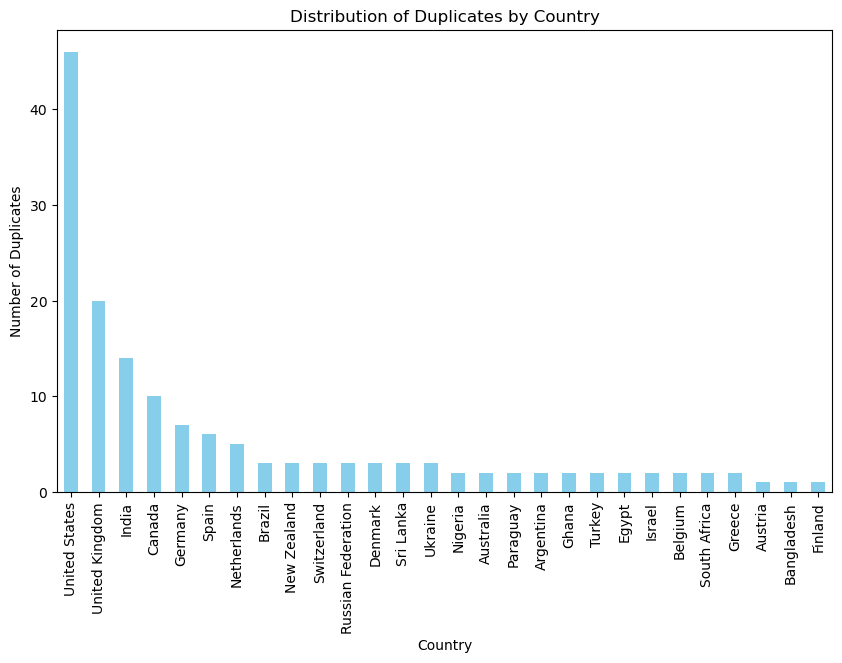

In [22]:
# Using a bar chart to represent the distribution of duplicates by Country 
country_distribution = duplicated_rows['Country'].value_counts()

plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=90)

plt.show()

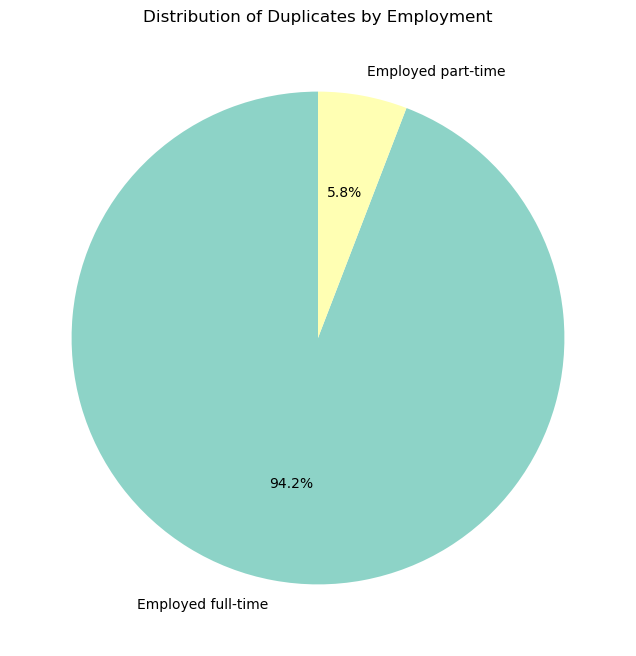

In [23]:
# Using a pie chart to represent the distribution of duplicates by Employment
plt.figure(figsize=(8, 8))
employment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(employment_distribution)))
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('')

plt.show()

# **Removing Duplicates**

### _1. Removing Duplicate Rows_


In [24]:
# Removing duplicate rows from the dataset using the drop_duplicates() function
df_no_duplicates = df.drop_duplicates()

### _2. Verifying the Removal_

In [25]:
# Verifying the removal by counting the number of duplicate rows after removal 
print(f"Number of rows after removing duplicates: {len(df_no_duplicates)}")

Number of rows after removing duplicates: 11398


# **Finding Missing Values**

In [27]:
# Identifying missing values for all columns
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       547
Ethnicity       683
Dependents      144
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


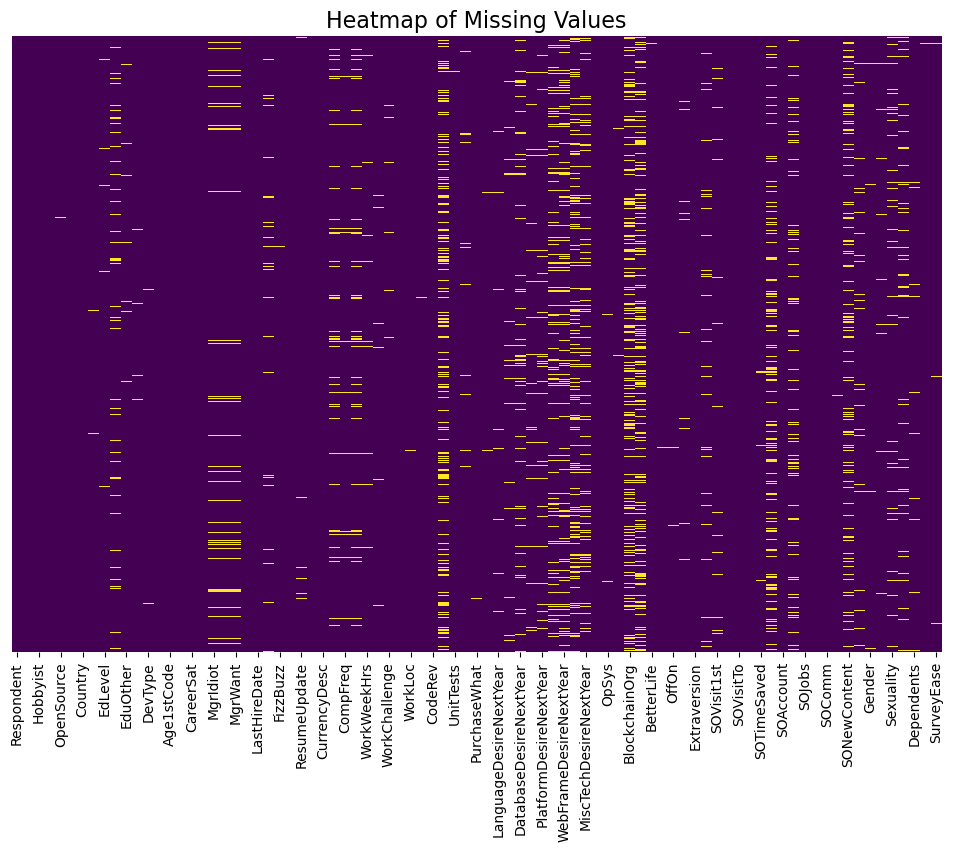

In [28]:
# Visualizing missing values using a heatmap (Using seaborn library)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=16)

plt.show()

In [29]:
# Counting the number of missing rows for the column Country
missing_country_count = df['Country'].isnull().sum()
print(f"Number of missing rows in the 'Country' column: {missing_country_count}")

Number of missing rows in the 'Country' column: 0


In [30]:
# Counting the number of missing rows for the column Employment
missing_employment_count = df['Employment'].isnull().sum()
print(f"Number of missing rows in the 'Employment' column: {missing_employment_count}")

Number of missing rows in the 'Employment' column: 0


In [31]:
# Counting the number of missing rows for the column DevType
missing_devtype_count = df['DevType'].isnull().sum()
print(f"Number of missing rows in the 'DevType' column: {missing_devtype_count}")

Number of missing rows in the 'DevType' column: 67


# **Imputing Missing Values**

### _1. Imputing Missing Values in the WorkRemote Column with the Majority Value_

In [36]:
# Finding out how many rows are missing in the column WorkRemote
missing_work_remote = df['WorkRemote'].isnull().sum()

print(f"The number of missing rows in the 'WorkRemote' column is: {missing_work_remote}")

The number of missing rows in the 'WorkRemote' column is: 8


In [33]:
# Finding the value counts for the column WorkRemote
work_remote_counts = df['WorkRemote'].value_counts()
print("Value counts for the 'WorkRemote' column:")
print(work_remote_counts)

Value counts for the 'WorkRemote' column:
WorkRemote
Less than once per month / Never                           5195
A few days each month                                      3242
Less than half the time, but at least one day each week    1105
All or almost all the time (I'm full-time remote)           976
It's complicated                                            463
More than half, but not all, the time                       301
About half the time                                         262
Name: count, dtype: int64


In [34]:
# Identifying the most frequent (majority) value in the WorkRemote column
most_frequent_value = df['WorkRemote'].mode()[0]

print("The most frequent value in the 'WorkRemote' column is:", most_frequent_value)

The most frequent value in the 'WorkRemote' column is: Less than once per month / Never


In [ ]:
# Imputing (replacing) all the empty rows in the column WorkRemote with the majority value
df['WorkRemote'] = df['WorkRemote'].fillna(most_frequent_value)

In [37]:
# Verifying if there are any missing values left
missing_work_remote_after_imputation = df['WorkRemote'].isnull().sum()

print(f"The number of missing rows in the 'WorkRemote' column after imputation is: {missing_work_remote_after_imputation}")

The number of missing rows in the 'WorkRemote' column after imputation is: 0


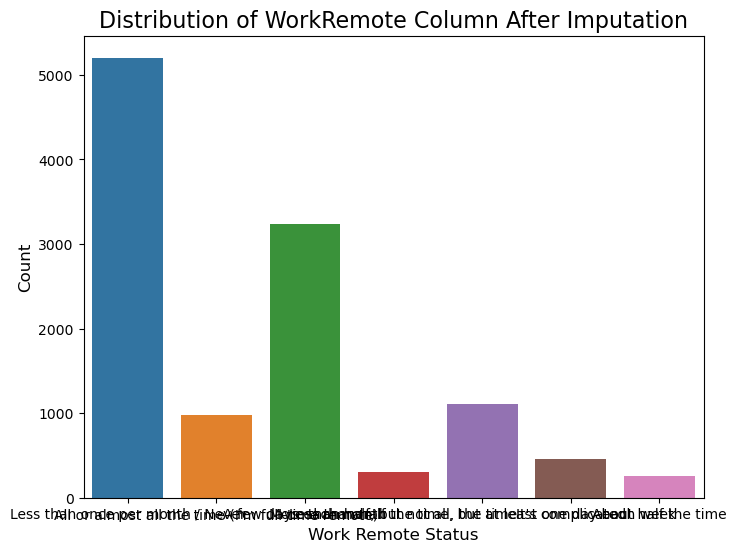

In [39]:
# Visualizing the distribution of 'WorkRemote' column after imputation
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='WorkRemote',hue='WorkRemote', legend=False )
plt.title('Distribution of WorkRemote Column After Imputation', fontsize=16)
plt.xlabel('Work Remote Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### _2. Imputing Missing Values in the ConvertedComp Column with Forward-fill_

In [44]:
# Identifying missing values in the column ConvertedComp
missing_converted_comp = df['ConvertedComp'].isnull().sum()
print(missing_converted_comp)

822


In [46]:
# Imputing missing values in the column ConvertedComp with forward-fill
df['ConvertedComp'] = df['ConvertedComp'].ffill()

In [48]:
# Verifying if there are any missing values left
missing_converted_comp_after_imputation = df['ConvertedComp'].isnull().sum()

print(f"The number of missing rows in the 'ConvertedComp' column after imputation is: {missing_converted_comp_after_imputation}")

The number of missing rows in the 'ConvertedComp' column after imputation is: 0


### _3. Imputing Missing Values in All Columns_

In [52]:
# Imputing numeric columns with mean
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(lambda col: col.fillna(col.mean()))

In [53]:
# Imputing categorical columns with mode
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').fillna(df.mode().iloc[0])

In [54]:
# Verifying no more missing values left
missing_values = df.isnull().sum()
print(missing_values)

Respondent                      0
MainBranch                      0
Hobbyist                        0
OpenSourcer                     0
OpenSource                      0
                               ..
Ethnicity                       0
Dependents                      0
SurveyLength                    0
SurveyEase                      0
NormalizedAnnualCompensation    0
Length: 86, dtype: int64


# **Normalizing Data**

Normalization is commonly applied to compensation data to bring values within a comparable range.

There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column says how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section, I will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.

In [49]:
# listing out the various categories in the column 'CompFreq'
print('CompFreq')
print (df['CompFreq'].value_counts())  

CompFreq
CompFreq
Yearly     6163
Monthly    4846
Weekly      337
Name: count, dtype: int64


In [50]:
# Creating a new column named 'NormalizedAnnualCompensation
norm_annual_comp = []

for i in range(len(df)):
    
    if df['CompFreq'].iloc[i] == 'Weekly':
        norm_annual_comp.append(df['CompTotal'].iloc[i]*52)
    elif df['CompFreq'].iloc[i] == 'Monthly':
        norm_annual_comp.append(df['CompTotal'].iloc[i]*12)
    else:
        norm_annual_comp.append(df['CompTotal'].iloc[i]*1)

df['NormalizedAnnualCompensation']= norm_annual_comp
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
